# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝4](#영상처리를-위한-딥러닝4)
  * [Convolutional Neural Network](#Convolutional-Neural-Network)
      * [FCNN](#FCNN)
      * [CNN](#CNN)
  * [CNN구현](#CNN구현)
      * [흑백 이미지: mnist](#흑백-이미지)
      * [색상 이미지: cifar10](#색상-이미지)

---
## 영상처리를 위한 딥러닝4

CNN.pdf 참고
### CNN 순한맛
### FCNN
- Fully Connected Neural Network
- 모든 weight 계산(이미지의 모든 픽셀의 연관관계를 한번에 모두 연산) > 비효율성 
- 위치에 민감
    - mnist 데이터는 모두 배경없이 중앙에 맞춤
- 똑같은 pixel은 다른 위치에 있더라도 똑같은 feature로 input되어야하는데, 위치가 바뀐 동일 feature(pixel)에 대 해서 hidden-Layer에서 동일한 feature을 중복해서 뽑아냄


### CNN
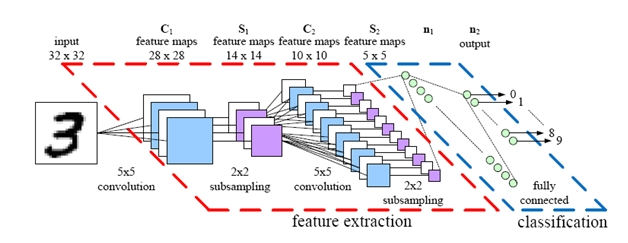
- CNN(Convolutional Neural Network)은 이미지의 **공간 정보를 유지**
- 인접 이미지와의 특징을 효과적으로 인식 하고 강조하는 방식으로 복수의 필터로 이미지의 **특징을 추출(feature extraction)** 과 이미지를 분류기(classifier)로 구성
- 특징 추출 영역은 Filter를 사용하여 공유 파라미터 수를 최소화하면서 이미지의 특징을 찾는 Convolution 레이어와 **특징을 강화하고 모으는 Pooling 레이어**로 구성
- CNN은 Filter의 크기, Stride, Padding과 Pooling 크기로 출력 데이터 크기를 조절하고, 필터의 개수로 출력 데이터 의 채널을 결정
- 각 레이어의 입출력 데이터의 형상 유지
- 필터를 공유 파라미터로 사용하기 때문에,  FCNN 와 비교하여 더 작은 학습 파라미터로 더 높은 인식률을 제공


1. ### locally-connected
    - 특정 픽셀에 대해서 거리가 가까운 pixel은 연관성이 있어서 계산
    - 거리가 먼 pixel은 연관성이 없는 것으로 보고서 계산하지 않는 방식
2. ### Convolutional Filter
    -  이미지가 locally-conntected한 이미지 데이터라는 것을 가정해야 나타나는 개념
    - (현재위치의 1pixel과 그 가로세로의 크기만큼의 주변pixel의 연관관계를 계산 - 가로x세로의 Kernel=Filter를 sliding 하면서 연산)
    - input의 위치와 관계없이, shared weight(특정 영역 추출)를 sliding window하고, 그것을 연산(dot product)하여, 똑 같은 feature라면 위치와 상관없이 해당feature를 뽑아낼 수 있음
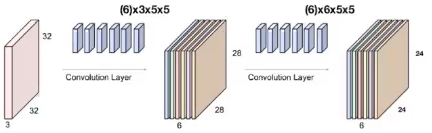
    - Feature Map은 합성곱 계산으로 만들어진 행렬
    - Activation Map은 Feature Map 행렬에 활성 함수를 적용한 결과 즉 Convolution 레이어의 최종 출력 결과가 Activation Map
    
    * Convolutional Layer:여러개의 Convolution Filter를 묶어놓은 것
        - 하나의 Filter당 하나의 feature를 뽑아냄. 그러므로 여러 개의 feature를 뽑아내기 위해서는 여러개의 Filter를 써야한 다.

    - 기본적으로 weight처럼 6개의 Convolutional Filter는 서로 다른 랜덤 초기화 필터
    - 각 Convolutional Filter는 6개가 각각 연산해서 각각 6개의 output을 만들고 그 output은 새로운 feature로서 6개가 쌓이는데 output feature라고 부른다.
        - input_filter_size와 convolutional filter의 filter_size는 같아야 함
        - output_filter_size와 convolutional Layer의 filter개수는 같아야 함

3. ### Padding 
    - Sub sampling
    - Padding을 통해서 Convolution 레이어의 출력 데이터의 사이즈를 조절
    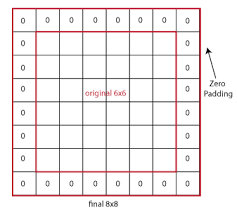
    - zero-padding : 외각을 “0”값으로 둘러싸는 특징으로 부터 인공 신경망이 이미지의 외각을 인식
    -  결과 값을 작아지는 것을 막아서 특징이 유실되는 것을 막음
    - 오버피팅도 방지하게 되는데, 원본 데이타에 0 값을 넣어서 원래의 특징을 희석 시켜 버리고, 이것을 기반으로 머신러닝 모델이 트레이닝 값에만 정확하게 맞아 들어가는 오버피팅 현상을 방지

4. ### Pooling
    - 데이터의 사이즈를 강제로 줄이는 개념. Max Pooling은 Max한 큰값만 챙기고 작은 값을 버림
    - 특징을 나타내는 픽셀은 그렇게 많기 때문에 중요한 pixel만 선별해서 연산
    - 즉, 필요없는 feature를 버려서, 남은 메모리는 다음 Conv Layer를 쌓는데 쓰는, 연산을 효율적으로 만듦 전체 데이타의 사이즈가 줄어들기 때문에 연산에 들어가는 컴퓨팅 리소스가 적음
    - 데이타의 크기를 줄이면서 소실이 발생하기 때문에, 오버피팅을 방지
    - 학습대상 파라미터가 없음
    - Pooling 레이어를 통과하면 행렬의 크기 감소 & 채널 수 무변
    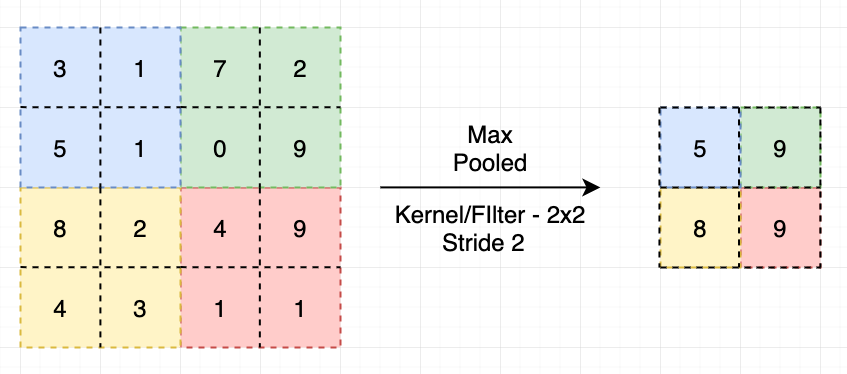
    ### Max Pooling
    - 실용적인 접근에 있어서 많이 안쓰려고 하는 추세
    - CNN의 Layer는 앞쪽일수록 저차원의 linear한 feature를 뽑아내고, 뒤로 갈수록 고차원의 feature를 뽑아냄 (hierarchy 특성)
  

> emprical
     - 귀납적 특성때문에 증명 불가
     - 실용성이 더 중요 

> cherry picking
     - Yann LeCun cake analogy : ML의 분류 강화학습은 체리로 비유하고 비지도학습 빵(핵심)
     - NFL 임에 불구하고 모델 돌리고 나서 좋은 결과만 보여주는 것
        - GAN 극찬했으나 이것도 cherry picking하였고 가능성을 보여주기 위함이였다함
        

최적의 모델 
- 하이퍼파라미터 튜징 GridSearchCV, keras-tuner로 자동으로 찾음
- 기준 모델만들고 Learning curve 보고 결정



>  과적합 방지 방법
    - cross validaiotn 
    - feature selection
    - dimensionality reduction
    - bagging
    - early stopping
    - regulizer(L1,L2)
    - dropout
    - noise (image)





---
- numpy programming 문제점 
    - GPU 불가
    - mutable
- tensor
    - GPU 지원
    - immutable 
    - functional api
    - 자동미분 Autograd 제공
        - back propagatoin 구현

참고 :https://www.tensorflow.org/tutorials/images/cnn


## CNN구현

In [29]:
import tensorflow as tf

### 데이터셋 준비
1. holdout
2. 데이터 모양 변경
    - 알고리즘에 따라서 데이터 받는게 다름(NFL)
    - CNN 3차원 
    - NN에만 효율적
3. 정규화

## 흑백 이미지

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #holdout

X_train = X_train.reshape((-1, 28, 28, 1))  # 6만개의 28x28 흑백 이미지
X_test = X_test.reshape((-1, 28, 28, 1))    # 1만개의 28x28 흑백 이미지

X_train, X_test = X_train / 255.0, X_test/ 255.0  #  0~1 사이로 정규화

#### 1차원 convolution
- Conv1D
- Convolution1D
    - 자연어처리에서 특징 추출, 신호처리

In [31]:
tf.keras.layers.Conv1D is tf.keras.layers.Convolution1D #동일 

True

In [32]:
tf.keras.layers.Conv2D is tf.keras.layers.Convolution2D #동일 

True

### 2차원 convolution
- 입력 (세로,가로,채널) 의 tensor
    - 방법론에 따라서 데이터 바꿈 
- Conv2D
- Convolution2D
    - args : **filter , kernel_size** , strides, padding data_format: 'valid', 'same', activation,use_bias, kernel_initializer 초기값, regularizer 과적합 방지, constraint 값 범위 정함 

- 합성곱 층: feature extraction
    - convolution+pooling 짝을 이루는거는 옛날 예시
- Dense 층: classification
### MaxPool2D
- 피라미드 형태로 node 를 늘리면 특징을 더 잘 추출 

In [33]:
#Sequential API 이해용도로 사용
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'), #3x3 커널 64개
    tf.keras.layers.MaxPool2D((2, 2)),    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [34]:
#상동
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

- 연산량이 많아서 FCNN에 비해서 느림 
- 데이터 자체가 전처리 잘 되어 있어서 정확도가 99%로 높음

In [36]:
#fit: gradient tape이용 low-level로 커스터마이징
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1392 - accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943


In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

## 색상 이미지
- 3 ~ 4 channels
### cifar10
- 60,000개의 10개의 클래스를 갖는 컬러 이미지(3 channels)
- train:test = 6:1

참고 : https://www.tensorflow.org/tutorials/images/cnn

In [38]:
(X_train, y_train), (X_tests, y_test) = tf.keras.datasets.cifar10.load_data() #holdout

#  0~1 사이로 정규화
X_train, X_tests = X_train / 255.0, X_tests/ 255.0

In [39]:
X_train.shape #작

(50000, 32, 32, 3)

In [40]:
import matplotlib.pyplot as plt

- 배경도 있음
- 다양한 이미지(돔물, automobile)
- 다양한 각도

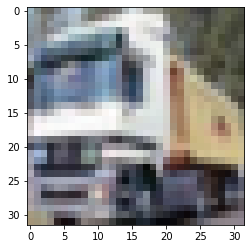

In [41]:
plt.imshow(X_train[1]) 

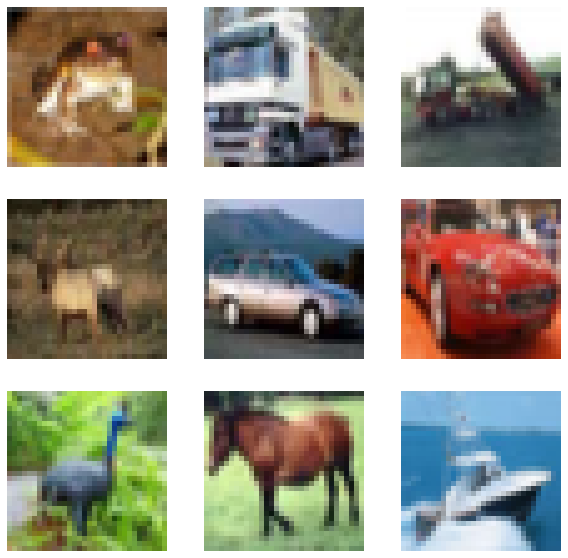

In [42]:
#여러 동물, 자동차,배 사진 섞여 있음
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.axis("off")

In [43]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4829 - accuracy: 0.4660
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1224 - accuracy: 0.6074
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9886 - accuracy: 0.6573
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8991 - accuracy: 0.6879
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8357 - accuracy: 0.7103


### 성능 향상
1. 합성곱 레이어 늘리기

In [46]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5443 - accuracy: 0.4385
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1843 - accuracy: 0.5815
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0327 - accuracy: 0.6358
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9335 - accuracy: 0.6709
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8598 - accuracy: 0.6983


In [48]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [49]:
#동일함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2. epochs를 늘림

In [50]:
 history=model.fit(X_train, y_train, epochs=15, validation_split=0.2)  #성능 체

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6093 - accuracy: 0.4092 - val_loss: 1.3769 - val_accuracy: 0.4976
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2578 - accuracy: 0.5505 - val_loss: 1.1974 - val_accuracy: 0.5849
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0966 - accuracy: 0.6152 - val_loss: 1.0756 - val_accuracy: 0.6258
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0047 - accuracy: 0.6453 - val_loss: 1.0159 - val_accuracy: 0.6462
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9362 - accuracy: 0.6735 - val_loss: 1.0046 - val_accuracy: 0.6489
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8806 - accuracy: 0.6924 - val_loss: 0.9893 - val_accuracy: 0.6571
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8289 - accuracy: 0.7094 - val_loss: 0.9342 - val_accuracy:

In [51]:
history.model.evaluate(X_tests,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0022 - accuracy: 0.6896


[1.0021979808807373, 0.6895999908447266]

In [52]:
history.history

{'accuracy': [0.40917500853538513,
  0.5504500269889832,
  0.6152499914169312,
  0.6452500224113464,
  0.6734750270843506,
  0.6923750042915344,
  0.7093999981880188,
  0.7233499884605408,
  0.7385749816894531,
  0.7494249939918518,
  0.7578750252723694,
  0.7700250148773193,
  0.7800750136375427,
  0.7903249859809875,
  0.7970749735832214],
 'loss': [1.6093446016311646,
  1.2577680349349976,
  1.096623182296753,
  1.004742980003357,
  0.9362399578094482,
  0.8806028366088867,
  0.8288653492927551,
  0.7870686650276184,
  0.7452731132507324,
  0.7136197090148926,
  0.685204029083252,
  0.6494736671447754,
  0.6206862926483154,
  0.592941403388977,
  0.5655162334442139],
 'val_accuracy': [0.4975999891757965,
  0.5849000215530396,
  0.6258000135421753,
  0.6462000012397766,
  0.6488999724388123,
  0.6571000218391418,
  0.678600013256073,
  0.6863999962806702,
  0.6782000064849854,
  0.6851000189781189,
  0.6809999942779541,
  0.6940000057220459,
  0.6984000205993652,
  0.694100022315979,

- loss 내려감 학습 잘됨  accuray증가
- val loss는 과적합
    - epochs 8에서 자르고 다른 방법으로 성능을 높임

교육장 2070있음 서버에서 이요중
tornado서버를 외부에서 접속 할 수있도록 함 ->domain,인증서
서버처럼 사용 

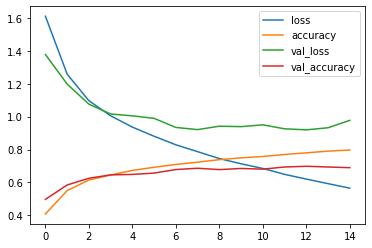

In [53]:
import pandas as pd
pd.DataFrame(history.history).plot.line()

한번에 epochs를 하지않으면 전체 결과값을 한번에 볼수 없음

In [57]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
hist=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5573 - accuracy: 0.4317
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1970 - accuracy: 0.5751
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0597 - accuracy: 0.6281
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9745 - accuracy: 0.6591
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9109 - accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8657 - accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8161 - accuracy: 0.7138
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7817 - accuracy: 0.7262
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7509 - accuracy: 0.7366
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.722

In [59]:
 hist=model.fit(X_train, y_train, epochs=5) #hist로부터 누적

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6899 - accuracy: 0.7573
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6679 - accuracy: 0.7655
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6438 - accuracy: 0.7730
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6190 - accuracy: 0.7822
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5967 - accuracy: 0.7897


In [60]:
hist.history #가장 최근의 5 history 만 부분적으로 나옴

{'accuracy': [0.757319986820221,
  0.7654600143432617,
  0.7729600071907043,
  0.7821999788284302,
  0.7897199988365173],
 'loss': [0.6898909211158752,
  0.6679338216781616,
  0.6438254714012146,
  0.6190052628517151,
  0.5966503024101257]}